## 3. Newton-Interpolation und Spline-Interpolation

**Interpolation** is the process of fitting existing data points to a function, so that it's possible to estimate the ones that are not there.

Polynomial interpolation -- aka Newton interpolation -- is the process by which the points are interpolated based on a polynomial.

Spline-interpolation is based on splines -- polynomials on each of the intervals, that are separate but smooth.

### Polynomial interpolation

In [2]:
#from sympy import interpolate,lambdify,init_printing,symbols
from sympy import *
init_printing()
x,y=symbols("x y")

N.B. the "import sympy as s" above. Wildcard imports sometimes conflict when function names overlap, and this is what happens with plot() below. (See [here](https://stackoverflow.com/questions/44263889/cant-convert-expression-to-float))

The function **interpolate()**, if the input matrix is 1D, interprets it as if there was a distance of 1. 

In [3]:
points=[(1,2),(22,9),(23,98)];
pol = interpolate(points,x)
points

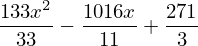

In [4]:
pol

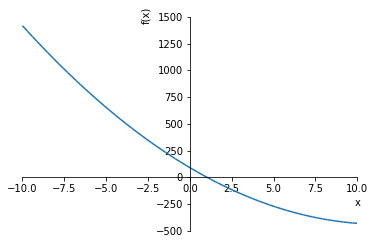

In [5]:
pl = plot(pol);

### Spline interpolation

In [6]:
DataPointsDomain = [1,2,3,4,4.5];
DataPointsRange = [9,1,10,32,-23];
s = interpolating_spline(2,x,DataPointsDomain,DataPointsRange);

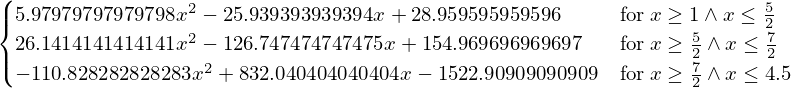

In [8]:
s

We lambdify the function to make it easier to calculate:

In [10]:
laIp=lambdify(x,s);

**pl = plot(s)** would fail, because it uses the undefined
**float(ln(0))** which gives an error. 

So we have to use **numpy**

In [11]:
import numpy as n
from matplotlib import pyplot as p

We create a range of points:

In [21]:
xx = n.arange(1., 4.5, 0.05)
y = []
for i in range(len(xx)):
   y.append(laIp(xx[i]));
y

[array(8.999999999999979),
 array(8.315959595959573),
 array(7.661818181818155),
 array(7.037575757575723),
 array(6.443232323232287),
 array(5.87878787878784),
 array(5.344242424242381),
 array(4.839595959595918),
 array(4.364848484848437),
 array(3.919999999999945),
 array(3.505050505050452),
 array(3.1199999999999406),
 array(2.7648484848484287),
 array(2.439595959595895),
 array(2.1442424242423535),
 array(1.8787878787878114),
 array(1.6432323232322474),
 array(1.4375757575756865),
 array(1.2618181818181036),
 array(1.115959595959513),
 array(0.9999999999999183),
 array(0.9139393939393088),
 array(0.8577777777776916),
 array(0.8315151515150561),
 array(0.8351515151514164),
 array(0.8686868686867797),
 array(0.932121212121114),
 array(1.0254545454544512),
 array(1.1486868686867666),
 array(1.3018181818180707),
 array(1.4848484848476744),
 array(1.7481818181809672),
 array(2.1422222222213065),
 array(2.6669696969687777),
 array(3.3224242424232955),
 array(4.108585858584917),
 array(5

Then we plot:

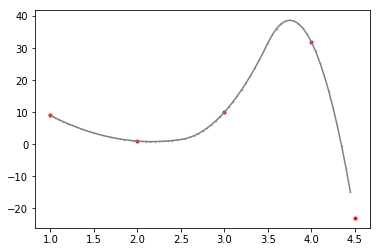

In [22]:
p.plot(DataPointsDomain,DataPointsRange, ls='', ms=6, marker='.',color='red');
p.plot(xx,y,c='grey', marker='.', ms=1)
p.show()